
<h1 align="center"> Using Data to Ball Out </h1>

# Motivating Example?


The more time I spend practicing basketball a week, the more likely I am to score points during a game. Right?

<img src="assets/b.jpg" alt="" style="width: 400px;" /> 

Let's say I want my team to win the finals and to see how much more I have to practice to score 50 points in a game. 

However, I don't know the relationship between hours spent practing and points scored.

What I can do is measure the amount of hours I practice and the points I score in the game for a week and use these historical values to infer future results.

Let's graph some points and see what they look like.

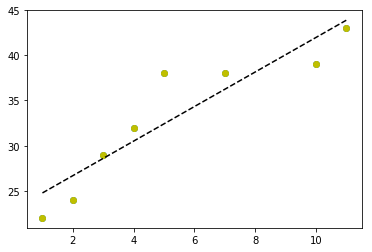

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
hours_practiced = [1,2,3,4,5,7,10,11]
points_scored= [22, 24, 29, 32, 38, 38, 39, 43]
plt.scatter(hours_practiced,points_scored)


fit = np.polyfit(hours_practiced,points_scored,1)
fit_fn = np.poly1d(fit) 

plt.plot(hours_practiced,points_scored, 'yo', hours_practiced, fit_fn(hours_practiced), '--k')


To me it looks like that data is linear, meaning we can describe it using a line drawn through it.

Linear regression is a way of modeling the relationship between a __scalar dependent variable y and one or more explanatory variables__

(in the simplest case this is just)

$$ F(x) = mx + b $$ 

# How does Linear Regression Work?
### Linear Regression is an optimization problem

First a define a __Cost Function__. This is a measure of how good your prediction is versus the actual measured values.

Find the values of m and b that minimize the following function

We will use the following, __sum of squares__, cost function.

$$ F(m,b) = \frac{1}{2} \sum_i \left(y_i - (x_i m + b) \right)^2$$

$\{x_i, y_i\}$ are known quantities (your data)


### How do we find the minimum of a convex function?
For each of the two parameters set the derivative equal to zero solve.

#### Lets start with $b$

$$ \frac{\partial F(m,b)}{\partial b} = nb  + m \sum_i x_i - \sum_i y_i $$
$$ 0 = nb  + m \sum_i x_i + \sum_i y_i $$
$$ b = \frac{1}{n} [\sum_i y_i - m \sum_i x_i]$$
$$ b = \overline{Y} - m \overline{X}$$


#### Now solve for $m$
Where $\overline{Y}$ refers to the average value of $y$ and $\overline{X}$ refers to the average value of $x$

$$ \frac{\partial F(m,b)}{\partial m} = \sum_i -x_i y_i + a x_i + bx_i^2 $$
$$ 0 = \sum_i -x_i y_i + b x_i + mx_i^2 $$

Substitute the value calculated for $b$ and solve.

$$m = \frac{\sum_i y_i x_i - n \overline{X}\overline{Y}}{\sum_i x_i^2 - n \overline{X}^2}$$


1.91344873502
22.8402130493


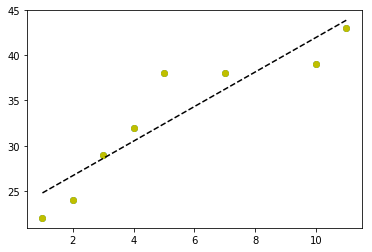

In [44]:
import numpy as np

xs, ys = np.array(hours_practiced), np.array(points_scored)
    
x_mean = xs.mean()
y_mean = ys.mean()

n = len(xs)

num = (xs * ys).sum() - (n * x_mean * y_mean)
denom = (xs * xs).sum() - (n * x_mean * x_mean)

m =  num / denom
b = y_mean - x_mean * m

print (num / denom)
print (b)

plt.scatter(hours_practiced,points_scored)
plt.plot(hours_practiced,points_scored, 'yo', hours_practiced, (m * xs) + b, '--k')

# Machine Learning Big Picture

Machine Learning is a field of Computer Science in which systemslearn and improve from experience without being explicitly programmed.

Machine learning explores the study and construction of algorithms that can learn from and make predictions on data

With the flourishing of the internet and cheap processing power Machine Learning has thrived is being applied to all sorts of domains to solve problems

* Identify Credit Card Fraud / Human Trafficking / All sorts of bad stuff
* Drive Cars
* Text to Speach
* Movie Recommender

And on and on and on.

## Nasr's Interpretation

While Machine Learning is a huge field and I am just a humble layman the following is my interpretation of how Machine Learning works.

You have a bunch of training data $S$ and a function $F$ which you are trying to approximate. This function could be hours practicing vs. points and it could also be the price of stock over two years.

You believe your training data $S$ is able to provide some insight on the problem at hand. Based on some prior domain knowledge you pick an Algorithim $A$ to fit your data.

You then tweak the parameters of $A$ to minimize some cost function relative to your training sample $S$.

# Overfitting vs.  Underfitting.

<img src="assets/uo.png" alt="" style="width: 800px;" /> 

The important to note is that the model with the least training error is not always the best! There is such a thing as overfitting where your model begins to memorize random noise in the data. Although your model does well on the training data it is does generalize well. 

Furthemore, you can have a model that underfits as well that is too simplistic to represent your data.

The art in Machine Learning is finding the balance between these two extremes.

# Cross Validation

Cross validation is a technique that can help one avoid overfitting. In the technique you train on some proportion of your data say 80% and then test on the remaining 20%. This way one can ensure that they have not simply memorized the training data and that their model can generalize to unseen data.